# Mappeoppgave 1 
### kandidatnummer:37

## Kapittel 1 

en tursitskatt på overnatting er en abgift som pålegges tursiter for hver overnatting på et hotell, vandrerhjem, feriebolig eller lignende. Avgiften kan variere i stærrelse avhenging av overnattingsstedet og vargiheten på oppholdet. turistskatter har blitt innført i en rekke byer og land over hele verden som en måte å øke inntektene o finansiere tursitrelaerte tiltak og innfrastuktur. 

begrunnelsen for innføring av en tursitskatt kan være flere. for det første kan den bidra til å redusere tursitstrømmen til overbelastede destinasjoner ved å øke prisene og dermed redusereetterspørselen. for andre kan tursitskatten øke inntekten til myndigheten for å finansiere tursitrelaterte tiltak som for eksempel vedlikkhold av tursitattraskjoner og innfrastruktur. I tillegg kan tursitskatten gi en rettferdigere fordeling av byrden mellom tursiter og lokalbefolkning når det gjelder kostnadene ved turisme. 

Tursitskatter er utbredt i en rekke land og byer over hele verden, spesielt i populære tursitdestinasjoner. eksmepeler på byer som har innført tursitskatt inkluderer Barcelona, Amsterdam, Roma og Venezia. Mange stater og land har også innført tursitskatt, inklurdert Frankrike, Italia og Japan. 

Erferingene med tursiteskatter varierer avhengig av implimenteringen og effektiviteten. noen studier har vist at tursitskatter kan føre til en reduksjon  i tursitstrømmen til enkelte destinasjoner, mens andre studier har vist at tursiter er mindre følsomme for prisøkninger enn man tidligere trodde. Enkelte stederhar også opplevd motstand fra tursitnæringen og turistene selv,som hevder at turistskattene kan ha en negativ effekt på turistopplevelsen og økonomien. det er derfor viktig å vurdere nøye hvordan tursitskatter gjennomføres og hvordan inntektene brukes for å sikre at de er effektive og rettferdige. 

## kapittel 2

Norge er et populært turistmål som tiltrekker seg millioner av besøkende hvert år. Landet er kjent for sine naturlige skjønnhet som inkluderer fjorder, fjell og nordlys. Nord-Norge som er fylkene Nordland og Troms og finnmark, er et spesielt populært reisemål på grunn av sitt unike arktiske lanskap og kultur. 

Ifølge SSB har antall hotellopphold i Norge vært jevnt økende det siste tiåret, med 34,5 millioner opphold i 2019. I Nord-Norge  har antall hotellopphold vært økende med 2.1millioner opphold i 2019.

Turistene har en tendens tilå besøke Nord-Norge i sommermånedene, med juli som toppmåneden for tursime. Det er midlertid også en betydelig økning i turisme i vintermånedene på grunn av nordlyssesongen. 

Det vanligste fremkostmidlene tursiter bruker er fly. cruisetursime er imidlertid også en viktig del av næringen, med mange tursiter som ankommer med skip for å besøke kystbyene og byene. 

hotelløkonomien i Nord-Norge er sterkt avhengig av turisme, med mange hoteller som opplever høye belegg i høysesøngen. det er imidlertid også konkurranse fra private overnatting gjennom plattformer som Airbnb, som har blitt stadig mer populært de siste årene. 

Å forstå disse punktene er viktig for å analysere størrelsen og betydningen av reiselivsnæringen i Nord-Norge. det kan hjelpe reiselivsinteressenter med å ta informerte beslutninger om infrastrukturutvikling, markedsføring og investeriger. det kan også hjelpe beslutningstakere å forstå 

In [2]:
# importerer ulike pakker
import json
import pandas as pd
import requests
from pyjstat import pyjstat
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from matplotlib.patches import Polygon

In [3]:

postUrl = "https://data.ssb.no/api/v0/no/table/10604/"

apiQuery = {
  "query": [
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "OTV",
          "SEV",
          "TRJ",
          "TRBSD",
          "TRSF",
          "TRF",
          "RBAV"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)


In [4]:
df

,reiselivsnæring,statistikkvariabel,år,value
0,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,20.3
1,Serveringsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,51.8
2,Transport med jernbane,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,4.0
3,"Transport med buss, sporvei og drosje","Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,27.9
4,Transport med skip og ferger,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,10.9
5,Transport med fly,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,5.5
6,Reisebyrå- og reisearrangørvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,4.3


In [5]:
df_transport = df[2:6]
sum = df_transport['value'].sum()

df2 = pd.DataFrame(
    [["Transportvirksomhet", "Sysselsetting (1 000 årsverk, heltidsekvivalen...", 2020, sum]],
                       columns= df.columns)

df2 = pd.concat([df,df2])

df2 = df2.drop(df2.index[[2,3,4,5]], axis= 0)

In [6]:
df2

,reiselivsnæring,statistikkvariabel,år,value
0,Overnattingsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,20.3
1,Serveringsvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,51.8
6,Reisebyrå- og reisearrangørvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,4.3
0,Transportvirksomhet,"Sysselsetting (1 000 årsverk, heltidsekvivalen...",2020,48.3


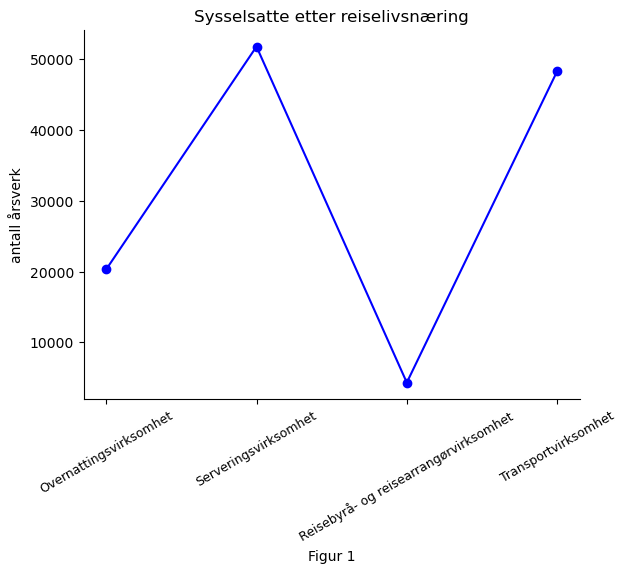

In [8]:
fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.plot(df2['reiselivsnæring'],df2['value']*1000, color= 'blue', marker='o')
ax.set_ylabel('antall årsverk')
ax.set_title('Sysselsatte etter reiselivsnæring')
ax.set_xlabel('Figur 1')
ax.xaxis.set_tick_params(labelsize=9, rotation = 30)

Fgiur 1 gir oss en oversikt over antall årsverk i de ulike vikrsomhetene og iser oss størrelsen på dem. Det er store forskjeller mellom de sysselsettingen i de foskjellige virksomheten. serveringsvirksomheten har flest ansatte med litt over 50 000 årsverk. Transportvirksomheten kommer på andreplass, med litt i underkant av 50 000 årsverk. Reisebyrå og reisearrangørvirksomheten er den minste næringen med 4000 årsverk mens overnattingsvirksomheten har 20 000 årsverk.

Alle de ulike virksomhetene tilbyr tjenester og goder til konsumentene. overnattingsvirksomhetenenes kapasitet påvirker det totale antallet tursiter som kan tiltrekes, og pris og kvalitet er en viktig faktor som kan tas i betrakning. transport muligheter er også like viktig så man kan ha tilgang til kyst destinasjone og andre transport midler. serveings steder er en viktig del av den totale opplevelsen og derfor veldig viktig med det også. reisebyrå og reisearrangørvirksomhtene kan bidra til å tilrettlegge aktiviteter for tursiter. Alle virksomhetene har en stor rolle i reiselivet og er veldig viktig for tursiter. det vil også være forksjeller i konsumentgrupper og kundesegmenter som må tas i betrakning. 

P.S. jeg erkjenner at tallene jeg har presentert i denne teksten er alle fra perioden etter utbruddet av koronapandemien, og det er viktig å ta hensyn til dette faktum når vi analyserer tallene. pandemien har naturligvis påvirket verdiene siden den har ført til permitteringer i pandemien. 

In [9]:
postUrl = "https://data.ssb.no/api/v0/no/table/10638/"

apiQuery = {
  "query": [
    {
      "code": "KonsumInnd",
      "selection": {
        "filter": "item",
        "values": [
          "TOTK",
          "UTLK",
          "NOHT",
          "NONF"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "FastePriser"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

df, df_id, ds = apiToDataframe(postUrl, apiQuery)

In [10]:
df

,konsumentgruppe,reiselivsnæring,statistikkvariabel,år,value
0,Totalt konsum,Turistkonsum i alt,Faste 2020-priser (mill. kr),2020,129750
1,Utlendingenes konsum i Norge,Turistkonsum i alt,Faste 2020-priser (mill. kr),2020,19046
2,Norske husholdningers turistkonsum i Norge,Turistkonsum i alt,Faste 2020-priser (mill. kr),2020,96036
3,Norske næringers utgifter til forretningsreise...,Turistkonsum i alt,Faste 2020-priser (mill. kr),2020,14668


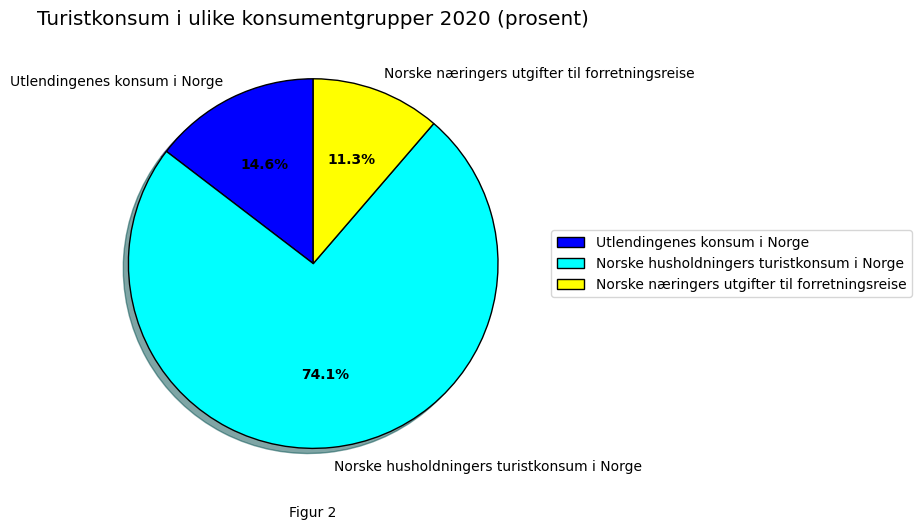

In [11]:
df_konsum = df[1:4]
df_konsum2 = df_konsum['value']/129750*100
df_konsum2

slices = [14.6,74,11.3]
labels = ["Utlendingenes konsum i Norge","Norske husholdningers turistkonsum i Norge", "Norske næringers utgifter til forretningsreise",]

fig, ax = plt.subplots(figsize=(6, 6))
colors = (  "blue", "cyan", "yellow") 


patches, texts, pcts = ax.pie(
    slices, labels=labels, autopct='%1.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'},
    textprops={'size': 'medium'}, colors =colors, shadow=True, startangle=90)
ax.set_title('Turistkonsum i ulike konsumentgrupper 2020 (prosent)', size = 'x-large')
ax.set_xlabel('Figur 2')
ax.legend(loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(pcts, color='black', fontweight='bold');


sektordiagrammet viser den prosentvise fordelingen av turistkonsum i Norge i 2020 på tre kategorier,  Utlendingens konsum i Norge (utlandske besøkende forbruk i Norge), norske husholdningers tursitkonsum i Norge (norske husholdningers turistkonsum ), og norsk næringers utgifter i til forretningsreise. Figuren viser oss at utlandkse besøkende forbruk i Norge sto for den største andelen på 74% av tursitforbruket i 2020, etterfulgt av norske husholdningers tursiforbruk med andel på 14,6%, også norske bedrifters utgifter til tjenestereiser i Norge som er på 11,3 %.

In [12]:
df_konsum2

1    14.678998
2    74.016185
3    11.304817
Name: value, dtype: float64

[None, None, None, None, None, None, None, None, None, None, None, None]

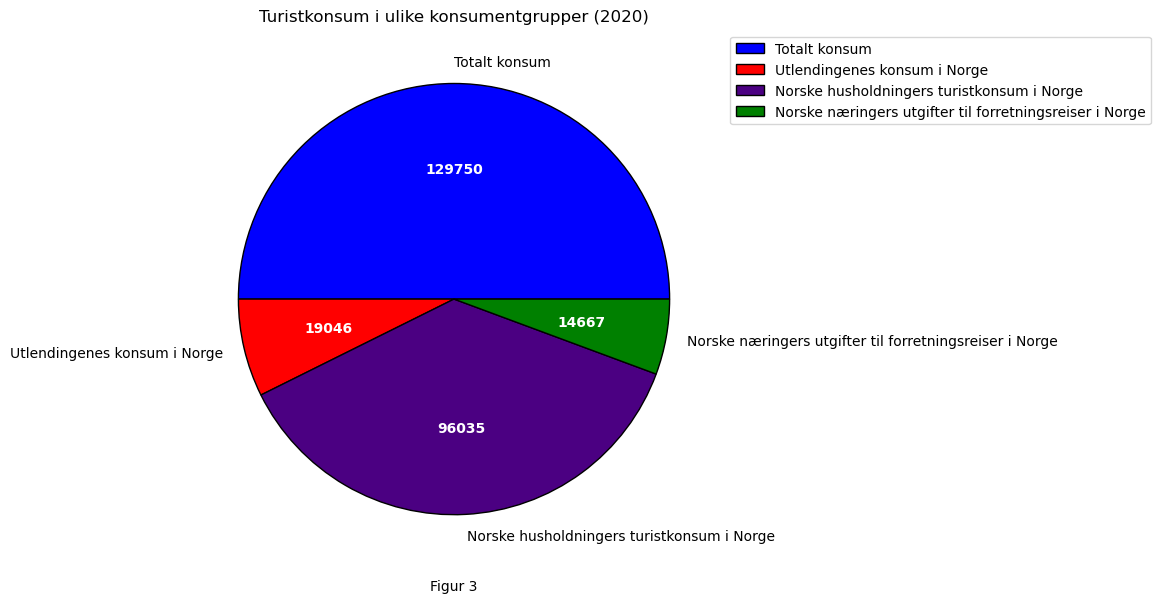

In [13]:
labels = ['Totalt konsum', 'Utlendingenes konsum i Norge', 'Norske husholdningers turistkonsum i Norge', 
     'Norske næringers utgifter til forretningsreiser i Norge']
slices = [129750, 19046, 96036, 14668]

colors = ("blue", "red", "indigo", "green")
fig, ax = plt.subplots(figsize=(10, 7))

def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:d}".format(absolute)

patches, texts, pcts = ax.pie(
    slices, labels=labels, autopct=lambda pct: func(pct, slices),
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    textprops={'size': 'medium'}, colors=colors,)
ax.set_title('Turistkonsum i ulike konsumentgrupper (2020)')
ax.set_xlabel('Figur 3')
ax.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(pcts, color='white', fontweight='bold')


[None, None, None, None, None, None, None, None, None, None, None, None]

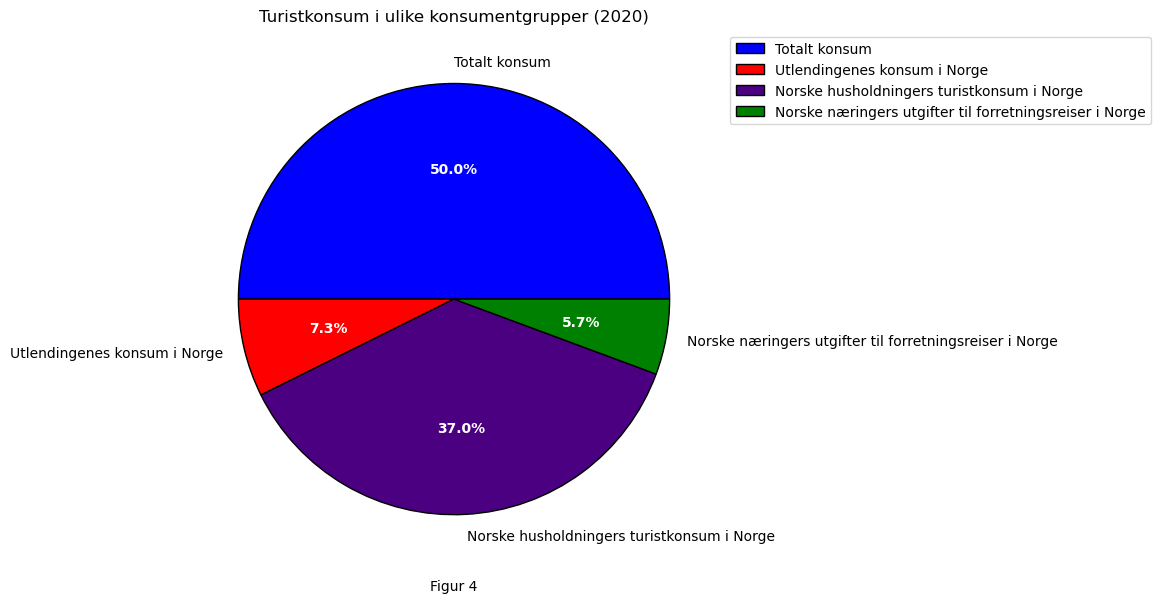

In [14]:
labels = ['Totalt konsum', 'Utlendingenes konsum i Norge', 'Norske husholdningers turistkonsum i Norge', 
     'Norske næringers utgifter til forretningsreiser i Norge']
slices = [129750, 19046, 96036, 14668]

colors = (  "blue","red", "indigo", "green")
fig, ax = plt.subplots(figsize =(10,7))

patches, texts, pcts = ax.pie(
    slices, labels=labels,autopct='%1.1f%%', 
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    textprops={'size': 'medium'}, colors =colors,)
ax.set_title('Turistkonsum i ulike konsumentgrupper (2020)')
ax.set_xlabel('Figur 4')
ax.legend(loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(pcts, color='white', fontweight='bold')

sektordiagrammet viser fordelingen av tursitforbruket på ulike forbruksgrupper i Norge i 2020. Den største delen av diagrammet representerer det totale tursitforbruket, som er på 129 750 millioner kroner. De andre skivene reprenseterer de spesifikke forbrukergruppene, der utlendingenes konsum (utlendingers forbruk i Norge) står for 14,7%, norsk husholdningers tursitkonsum (norsk husholdningers tursitkonsum i Norge) utgjør 74% mens norsk næringers utgifter til forrentningsreiser (norsk bedrifter). Utgifter til tjenestereiser i Norge utgjør 11,3% av det totalet turistforbruket. Sektordiagrammet viser en visuell representasjon av de relative størrelsene på hver forbruksgruppes bidrag til det totale tursitforbruket i Norge 

In [ ]:
## Kapittel 3 

Formålet med å innføre en turistskatt på overnattinger kan være å generere inntekter til lokal- og/eller nasjonaløkonomien, samt å regulere turismen ved å redusere antall turister eller redusere miljøbelastningen fra turismeaktiviteter. Skatten kan også være en måte å redusere ulikhet i inntekt og fordeling ved å øke skatteinntektene og bruke dem til sosiale programmer og tjenester.

Markedet for overnattinger uten en skatt vil følge vanlig tilbud og etterspørsel-prinsipper, hvor prisen på overnattinger bestemmes av samspillet mellom tilbud og etterspørsel. Etterspørselen etter overnattinger vil avhenge av faktorer som sesong, destinasjonens popularitet, turistenes preferanser, og inntektene deres. Tilbudet av overnattinger vil avhenge av faktorer som hotellenes kapasitet, tilgangen på eiendommer til leie, og kostnadene for å drive hoteller og andre overnattingssteder.

Etter at en turistskatt blir innført, vil prisen på overnattinger øke, noe som kan føre til en reduksjon i etterspørselen. Dette kan ha en innvirkning på antall turister som besøker en destinasjon og omfordelingen av turistene mellom forskjellige destinasjoner. Økt skatteinntekt kan brukes til å finansiere offentlige tjenester eller investeringer i turistinfrastruktur, som kan forbedre destinasjonens attraktivitet for turister.

Effektivitets- og fordelingseffekter av en turistskatt vil avhenge av flere faktorer, som størrelsen på skatten, priselasticiteten til etterspørselen, og hvordan skatteinntektene brukes. Hvis skatten er for høy, kan det føre til en stor reduksjon i etterspørselen og dermed en negativ effekt på turistindustrien. Hvis skatten brukes på en måte som forbedrer turistinfrastrukturen eller finansierer offentlige tjenester, kan det ha positive fordeler for både turister og lokalbefolkningen.

Priselastisiteten til etterspørselen etter overnattinger kan variere avhengig av faktorer som destinasjon, turistenes inntekt, og reiseformål. En vanlig estimat for priselastisitet er mellom -0,5 og -1,5, som betyr at en 1% økning i prisen på overnattinger kan føre til en reduksjon i etterspørselen på mellom 0,5% og 1,5%.

En generisk rammeverk for å analysere effekten av en turistskatt kan inkludere en etterspørselskurve, en tilbudskurve og en ny likevektspris etter innføringen av skatten. Formelen for etterspørselskurven kan være Qd = a - bP, der Qd representerer etterspørselen etter overnattinger, P representerer prisen på overnattinger, og a og b er konstanter som representerer henholdsvis etterspørselsnivået og priselastisiteten til etterspørselen. Formelen for tilbudskurven kan være Qs = c + dP, der Qs representerer tilbudet av overnattinger, P representerer prisen på overnattinger, og c og d er konstanter som representerer henholdsvis tilbudsnivået og priselasticiteten til tilbudet.

Ved å sette etterspørselskurven og tilbudskurven sammen, kan vi finne likevektsprisen på overnattinger før innføringen av turistskatten. Etter innføringen av skatten vil prisen på overnattinger øke, og etterspørselen vil trolig synke. Vi kan bruke priselastisiteten til etterspørselen til å estimere hvor mye etterspørselen vil synke etter innføringen av skatten.

En illustrasjon av etterspørselskurven, tilbudskurven og likevektsprisen før og etter innføringen av turistskatten kan gi en visuell forståelse av hvordan markedet vil reagere på endringen. Ved å beregne skatteinntektene og analysere hvordan de blir brukt, kan vi også vurdere om formålet med innføringen av turistskatten blir oppfylt.

In [15]:
from sympy import symbols, Eq

p, x, t = symbols('p x t', real=True, positive=True)

def x_d(p):
    return 500 - 3.2 * p

def x_s(p, t):
    return -100 + 4.3 * (p - t)

eq_cond = Eq(x_d(p), x_s(p, t))
eq_cond


Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [16]:
import numpy as np
from scipy.optimize import root_scalar

def x_d(p):
    return 500 - 3.2*(p)

def x_s(p,t):
    return -100 + 4.3*(p-t)

t = 0

# definer en funksjon som skal være lik null for likevektspunktet
def eq_cond(p):
    return x_d(p) - x_s(p, t)

# bruk root_scalar for å finne nullpunktet til eq_cond
sol = root_scalar(eq_cond, bracket=[0, 1000], method='brentq')
p_eq = sol.root
x_eq = x_d(p_eq)

print("Likevektspris:", p_eq)
print("Likevektskvantum:", x_eq)


Likevektspris: 80.0
Likevektskvantum: 244.0


In [17]:
import numpy as np
from scipy.optimize import minimize_scalar

def x_d(p):
    return 500 - 3.2*(p)

def x_s(p,t):
    return -100 + 4.3*(p-t)

t = 4

# Definer funksjonen som skal optimaliseres
def objective(p):
    return abs(x_d(p) - x_s(p, t))

# Sett startverdien for optimaliseringen
x0 = 50

# Bruk minimize_scalar() funksjonen for å finne optimal verdi for p
res = minimize_scalar(objective, method='bounded', bounds=(0, 1000))
p_eq_2 = res.x

# Finn likevektskvantum med en avgift
x_eq_2 = x_d(p_eq_2)

# Print resultatene
print("Likevektspris med en avgift:", round(p_eq_2, 3))
print("Likevektskvantum med en avgift:", round(x_eq_2, 3))


Likevektspris med en avgift: 82.293
Likevektskvantum med en avgift: 236.661


In [18]:
import sympy as sp

p, x, t = sp.symbols('p x t', real=True)

# Definer funksjonene
x_d = 500 - 3.2*p
x_s = -100 + 4.3*(p-t)

# Løs for inverse funksjoner
eq_d = sp.solve(x_d - x, p)
eq_s = sp.solve(x_s - x, p)

# Print resultatene
print("Etterspørselsfunksjonens inverse funksjon:", eq_d)
print("Tilbudsfunksjonens inverse funksjon:", eq_s)


Etterspørselsfunksjonens inverse funksjon: [156.25 - 0.3125*x]
Tilbudsfunksjonens inverse funksjon: [t + 0.232558139534884*x + 23.2558139534884]


In [19]:
# inversefunksjonene
def x_d1(x):
    return 156.25 - 0.3125*x

def x_s1(x,t): 
    return t + 0.232558139534884*x + 23.2558139534884

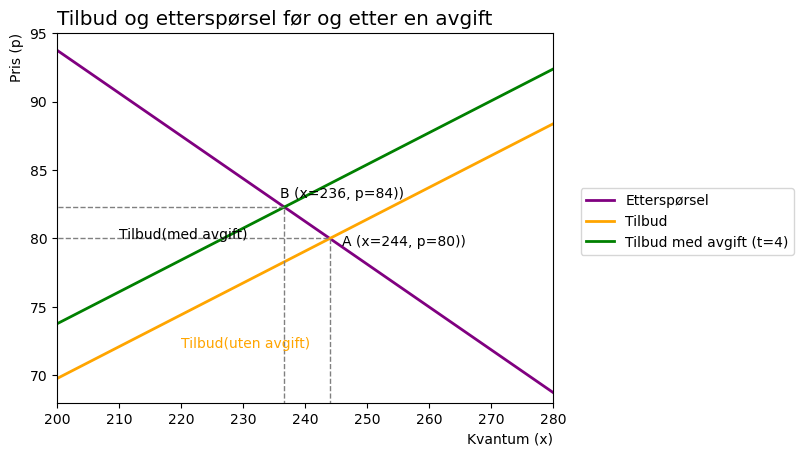

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definer funksjonene
def x_d(p):
    return 500 - 3.2*p

def x_s(p, t):
    return -100 + 4.3*(p - t)

# Lag linspace-array for kvantum
x_num = np.linspace(0.1, 300, 100)

# Lag fig og ax-objekter
fig, ax = plt.subplots()
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set_ylabel('Pris (p)', loc='top')
ax.set(xlim=(200,280))
ax.set(ylim=(68,95))
ax.set_title('Tilbud og etterspørsel før og etter en avgift', loc='left', size='x-large')

# Plot funksjonene og legg til navn og farger
ax.plot(x_d(x_num), x_num, label='Etterspørsel', linewidth=2, color='purple')
ax.plot(x_s(x_num, 0), x_num, label='Tilbud', linewidth=2, color='orange')
ax.plot(x_s(x_num, 4), x_num, label='Tilbud med avgift (t=4)', linewidth=2, color='green')

# Legg til likevektskvantum før og etter avgift
ax.text(246, 79.5, "A (x=244, p=80))")
ax.text(236, 83, "B (x=236, p=84))")
ax.text(220,72, 'Tilbud(uten avgift)', color="orange")
ax.text(210, 80, 'Tilbud(med avgift)', color="black")

ax.vlines(x_eq,0,p_eq, color='grey',ls='dashed', linewidth = 1)
ax.hlines(p_eq_2,0,x_eq_2, color='grey',ls='dashed', linewidth = 1)
ax.vlines(x_eq_2,0,p_eq_2, color='grey',ls='dashed', linewidth = 1)
ax.hlines(p_eq,0,x_eq, color = 'grey', ls = 'dashed', linewidth = 1)

# Vis legende
ax.legend(bbox_to_anchor=(1.5,0.6))

# Vis plottet
plt.show()


Figuren viser etterspørsels- og tilbudskurvene før og etter implementeringen av en turistskatt. Etterspørselen er omvendt relatert til prisen på tjenesten, noe som betyr at når prisen øker, reduseres antallet forbrukere som er villige til å betale for tjenesten. Motsatt, når prisen synker, øker etterspørselen etter tjenesten, siden flere forbrukere har råd til det.

Når det legges turistavgift på tilbudssiden, er det en tydelig venstreforskyvning i tilbudskurven. Dette er illustrert i grafen ved bevegelsen fra likevektspunkt A uten avgift, til likevektspunkt B med skatt, som flyttes mot venstre, noe som resulterer i et mindre omsatt kvantum og en høyere pris.

Grafen viser også at tilbudet er positivt relatert til prisen på tjenesten. Når prisene øker, er produsentene mer tilbøyelige til å produsere mer, mens når prisene synker, produserer de mindre.

Det er viktig å ta hensyn til elastisiteten i både tilbud og etterspørsel når man analyserer turistskattens innvirkning på overnattinger. Dersom tilbud og etterspørsel er svært elastisk vil prisen stige i mindre grad, mens mengden vil avta mer. Omvendt, hvis tilbud og etterspørsel er mindre elastiske, vil prisen stige mer, mens mengden vil avta mindre.

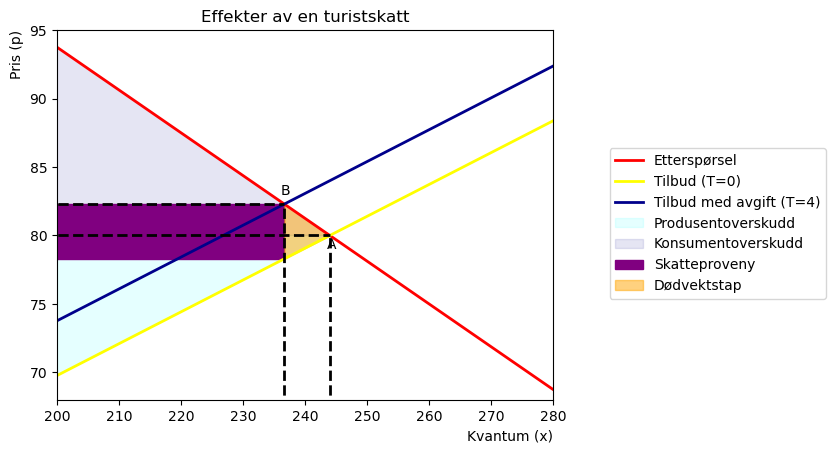

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x_num = np.linspace(0.1, 300, 100)
z = np.linspace(60, x_eq, 100)
y = np.linspace(60, x_eq_2, 100)
q = np.linspace(x_eq_2, x_eq, 100)

def create_ax():
    fig, ax = plt.subplots()
    ax.set_xlabel('Kvantum (x)', loc='right')
    ax.set_ylabel('Pris (p)', loc='top')
    ax.set_xlim(200, 280)
    ax.set_ylim(68, 95)
    ax.set_title('Effekter av en turistskatt', size='large')
    return fig, ax

fig, ax = create_ax()

ax.plot(x_num, x_d1(x_num), label='Etterspørsel',color='red', linewidth=2)
ax.plot(x_num, x_s1(x_num, 0), label='Tilbud (T=0)',color='yellow', linewidth=2)
ax.plot(x_num, x_s1(x_num, 4), label='Tilbud med avgift (T=4)',color= 'darkblue', linewidth=2)

ax.vlines(x_eq, 0, p_eq, color='black', ls='dashed', linewidth=2)
ax.hlines(p_eq_2, 0, x_eq_2, color='black', ls='dashed', linewidth=2)
ax.vlines(x_eq_2, 0, p_eq_2, color='black', ls='dashed', linewidth=2)
ax.hlines(p_eq, 0, x_eq, color='black', ls='dashed', linewidth=2)

ax.fill_between(z, p_eq, x_s1(z, 0), color="cyan", alpha=0.1, label='Produsentoverskudd')
ax.fill_between(z, p_eq, x_d1(z), color="darkblue", alpha=0.1, label='Konsumentoverskudd')
ax.fill_between(y, p_eq_2 - 4, p_eq_2, color='purple', label='Skatteproveny')
ax.fill_between(q, x_s1(q, 0), x_d1(q), color="orange", alpha=.5, label="Dødvektstap")

ax.text(243.5, 79, "A")
ax.text(236, 83, "B")

ax.legend(bbox_to_anchor=(1.1, 0.7))

plt.show()

Koden definerer funksjoner for etterspørsel og tilbud, og bruker disse funksjonene til å plotte tre grafer i samme koordinatsystem: etterspørsel, tilbud (uten avgift) og tilbud (med avgift). Grafen viser også linjer for likevektspris og likevektskvantum i tillegg til linjer som viser hvordan skatteproveny og dødvektstap kan illustreres grafisk.

Den fargede flaten mellom etterspørselskurven og tilbudskurven (tilbud med avgift) representerer produsentoverskuddet, mens flaten mellom etterspørselskurven og tilbudskurven (uten avgift) representerer konsumentoverskuddet. Skatteprovenyet er representert av den fargede flaten mellom likevektskvantum med avgift og likevektskvantum uten avgift, og dødvektstapet er den fargede flaten mellom kvantumene der tilbudskurven med avgift og etterspørselskurven krysser hverandre.

Grafen viser hvordan en turistskatt påvirker et marked ved å redusere etterspørselen og øke prisen. Effektene av turistskatten illustreres på en oversiktlig måte, og gir en god visuell forståelse av hvordan økonomiske aktører påvirkes av skatten.

En turistskatt på overnattinger kan påvirke fordelingen av inntektene i turistnæringen. Dette kan skje ved at hoteller og overnattingssteder velger å øke prisene for å dekke kostnaden, eller velge å absorbere kostnaden og redusere fortjenesten. Dersom kostnaden overføres til turistene, kan det føre til en reduksjon i turistenes forbruk på andre områder, som restauranter og suvenirbutikker.

grafen viser tydelig hvilke effekter en turistskatt kan ha for både produsenten og konsumenten, samt for effektiviteten i samfunnet. Skatteproveny refererer til skatteinntektene som myndighetene får, og i tilfellet med turistskatt vil dette ta andeler av overskuddet til både produsent og konsument. Produsentene vil måtte betale skatteprovenyet til myndighetene, mens konsumentene vil måtte betale mer for tjenestene. Det er dermed viktig å ta hensyn til alle de mulige konsekvensene av en turistskatt før den implementeres.


## Kapittel 4 

Innføringen av en turistskatt på overnattinger er et omstridt tema, og det er viktig å vurdere både fordeler og ulemper før man tar en beslutning. En turistskatt kan gi en viktig inntektskilde for lokalsamfunnene som er avhengige av turisme, men samtidig kan det føre til at turistene velger andre destinasjoner med lavere priser og avgifter. Dette kan ha en negativ innvirkning på turistindustrien og påvirke økonomien til lokalsamfunnene som er avhengige av turisme.

Grad av elastisitet i tilbud og etterspørsel vil også spille en viktig rolle i å avgjøre om en turistskatt vil ha en negativ eller positiv innvirkning på turistindustrien og lokalsamfunnene. Dersom tilbud og etterspørsel er svært elastiske, vil en økning i priser og avgifter føre til at turistene vil velge andre destinasjoner med lavere priser. Dette vil igjen ha en negativ innvirkning på turistindustrien og lokalsamfunnene som er avhengige av turisme.

Det er også viktig å vurdere formålet bak avgiften. Dersom turistskatten er ment å finansiere lokale prosjekter som forbedrer turistopplevelsen eller bidrar til å opprettholde lokalsamfunnene, kan dette være en positiv utvikling for turistindustrien og lokalsamfunnene. Men dersom turistskatten kun er ment å øke inntektene til lokalregjeringen, kan dette ha en negativ innvirkning på turistindustrien og lokalsamfunnene.

Sammendragt bør man veie fordeler og ulemper nøye før man tar en beslutning om å innføre en turistskatt på overnattinger. Dette vil sikre at enhver beslutning som tas, tar hensyn til både turistnæringen og lokalsamfunnenes interesser.